In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [37]:
train = pd.read_csv("/content/House_Rent_Train.csv") #Load train data (Write train.csv directory)
test = pd.read_csv("/content/House_Rent_Test.csv") #Load test data (Write test.csv directory)


data = train.append(test,sort=False)#Make train set and test set in the same data set
data

<ipython-input-37-2c1c1420873b>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = train.append(test,sort=False)#Make train set and test set in the same data set


,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,9/10/2017 12:48,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12/6/2018 22:02,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,ff8081815216f51101521aa9d46c191f,BHK2,Hanumanthnagar,10-06-2018 18:22,12.941654,77.559999,FAMILY,0,0,0,...,2.0,N,2.0,3.0,3.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,2.0,NaN
4496,ff8081816098166901609bf52bb702a8,BHK2,Lakkasandra,21-01-2018 14:36,12.942973,77.597738,ANYONE,0,0,0,...,1.0,N,2.0,2.0,3.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,1.0,NaN
4497,ff808181629ac9860162a7ac1a4253bb,BHK1,"Jeevan Samskruthi Apartment, Shiridi Sai Templ...",30-05-2018 16:10,12.949315,77.713807,ANYONE,0,0,0,...,1.0,W,1.0,2.0,3.0,"{""SC"":false,""INTERCOM"":false,""AC"":false,""PB"":f...",CORP_BORE,IH,0.0,NaN
4498,ff8081815b57c717015b580af22f1bbd,BHK3,Mullur,11-07-2018 16:17,12.914104,77.716428,FAMILY,1,1,1,...,3.0,N,4.0,10.0,10.0,"{""SC"":false,""INTERCOM"":true,""AC"":false,""PB"":tr...",BOREWELL,AP,3.0,NaN


In [38]:
data.isnull().sum()

id                    0
type                 27
locality            160
activation_date      23
latitude             23
longitude            23
lease_type           23
gym                   0
lift                  0
swimming_pool         0
negotiable            0
furnishing            0
parking               0
property_size         0
property_age         23
bathroom             23
facing               23
cup_board            23
floor                23
total_floor          23
amenities            23
water_supply         23
building_type        23
balconies            23
rent               4523
dtype: int64

In [39]:
half_rows = len(data) // 2
half_rows

12527

In [40]:
half_rows = len(data) // 2
data = data.drop(data.index[:half_rows])
data

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
12527,ff80818160b6f2b60160b7c819223f66,BHK1,Marathahalli,3/1/2018 12:52,12.966113,77.717763,FAMILY,0,0,0,...,2.0,N,1.0,0.0,4.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IF,0.0,20000.0
12528,ff808181612cb26b01612d0e74701514,BHK2,Jayanagar,25-01-2018 17:11,12.922581,77.592854,ANYONE,0,0,0,...,2.0,S,2.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,1.0,20000.0
12529,ff8081816416ffa4016417e4af584938,BHK2,Jayanagar,19-06-2018 19:10,12.935607,77.592916,ANYONE,0,1,0,...,1.0,E,2.0,4.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,1.0,15500.0
12530,ff80818164ad880c0164b07699f453aa,BHK3,"Munnireddy Layout,Panathur",19-07-2018 12:52,12.937673,77.701969,ANYONE,1,1,0,...,2.0,N,3.0,0.0,4.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",CORPORATION,AP,1.0,26000.0
12531,ff80818164589fb601645992312030b2,BHK3,Doddanekundi,2/7/2018 14:53,12.977970,77.691282,FAMILY,1,1,1,...,3.0,E,5.0,2.0,4.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",BOREWELL,AP,2.0,35000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
half_rows = len(data) // 2
half_rows

4014

In [42]:
half_rows = len(data) // 2
data = data.drop(data.index[:half_rows])
data

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
16541,ff80818160792cc001607e28765b34a2,BHK2,Banashankari,22-12-2017 18:25,12.934860,77.561093,ANYONE,0,1,0,...,2.0,N,2.0,3.0,3.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,2.0,16000.0
16542,ff8081815525cfad015529cafdc82aeb,BHK2,Hosakerehalli,3/7/2017 10:34,12.916055,77.536256,ANYONE,0,0,0,...,2.0,N,2.0,0.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,0.0,10000.0
16543,ff80818163f29c9e0163f8a87e0f7804,RK1,Indiranagar,19-07-2018 20:49,12.971776,77.636025,ANYONE,0,0,0,...,1.0,E,3.0,3.0,3.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IH,1.0,12500.0
16544,ff8081816201464001620461009b537b,BHK2,"Nallurhalli,Whitefield",8/3/2018 20:43,12.970282,77.735438,ANYONE,1,1,1,...,2.0,E,2.0,7.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",BOREWELL,AP,1.0,22500.0
16545,ff8081816411d499016413da616b260f,BHK2,Marathahalli,19-06-2018 15:12,12.954533,77.692249,FAMILY,0,0,0,...,2.0,NE,2.0,4.0,5.0,"{""HK"":true,""PARK"":false,""LIFT"":true,""PB"":true,...",CORP_BORE,AP,4.0,22000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
#Dealing with NULL values

#data = data.dropna(axis=1, how='any') #Drop columns that contain  NULL values
data.dropna(inplace=True)
data = data.fillna(data.mean()) #Replace NULL values with mean values
data

<ipython-input-44-28932bb087e4>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean()) #Replace NULL values with mean values


,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
16541,ff80818160792cc001607e28765b34a2,BHK2,Banashankari,22-12-2017 18:25,12.934860,77.561093,ANYONE,0,1,0,...,2.0,N,2.0,3.0,3.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,2.0,16000.0
16542,ff8081815525cfad015529cafdc82aeb,BHK2,Hosakerehalli,3/7/2017 10:34,12.916055,77.536256,ANYONE,0,0,0,...,2.0,N,2.0,0.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,0.0,10000.0
16543,ff80818163f29c9e0163f8a87e0f7804,RK1,Indiranagar,19-07-2018 20:49,12.971776,77.636025,ANYONE,0,0,0,...,1.0,E,3.0,3.0,3.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IH,1.0,12500.0
16544,ff8081816201464001620461009b537b,BHK2,"Nallurhalli,Whitefield",8/3/2018 20:43,12.970282,77.735438,ANYONE,1,1,1,...,2.0,E,2.0,7.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",BOREWELL,AP,1.0,22500.0
16545,ff8081816411d499016413da616b260f,BHK2,Marathahalli,19-06-2018 15:12,12.954533,77.692249,FAMILY,0,0,0,...,2.0,NE,2.0,4.0,5.0,"{""HK"":true,""PARK"":false,""LIFT"":true,""PB"":true,...",CORP_BORE,AP,4.0,22000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,ff80818159ded60e0159dfff948e5bcb,BHK1,Ulsoor,11/10/2017 17:08,12.979762,77.615395,ANYONE,0,1,0,...,2.0,E,1.0,1.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,1.0,20000.0
20528,ff8081815e73c2e2015e74ac10e91975,BHK2,Koramangala 4th Block,19-10-2017 20:31,12.931072,77.632361,ANYONE,0,0,0,...,2.0,N,2.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,2.0,30000.0
20529,ff8081816073f28c016077bb8db47e4f,BHK2,Kumaraswamy Layout,21-12-2017 21:18,12.901800,77.566597,FAMILY,1,1,0,...,2.0,W,2.0,5.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,16000.0
20530,ff8081814c6f8c9b014c6febae49016f,BHK2,Indiranagar,28-06-2018 21:58,12.965502,77.647694,FAMILY,0,1,0,...,2.0,E,2.0,2.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,3.0,30000.0


In [45]:
data.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()
for col in ['locality','lease_type','facing','amenities','water_supply','building_type','type','furnishing','parking','id']:
  data[col]=model.fit_transform(data[col])

data

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
16541,2176,1,91,22-12-2017 18:25,12.934860,77.561093,0,0,1,0,...,2.0,1,2.0,3.0,3.0,636,2,0,2.0,16000.0
16542,390,1,270,3/7/2017 10:34,12.916055,77.536256,0,0,0,0,...,2.0,1,2.0,0.0,2.0,240,2,2,0.0,10000.0
16543,3572,5,287,19-07-2018 20:49,12.971776,77.636025,0,0,0,0,...,1.0,0,3.0,3.0,3.0,286,2,3,1.0,12500.0
16544,2780,1,492,8/3/2018 20:43,12.970282,77.735438,0,1,1,1,...,2.0,0,2.0,7.0,12.0,849,0,0,1.0,22500.0
16545,3612,1,445,19-06-2018 15:12,12.954533,77.692249,3,0,0,0,...,2.0,2,2.0,4.0,5.0,28,2,0,4.0,22000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,675,0,660,11/10/2017 17:08,12.979762,77.615395,0,0,1,0,...,2.0,0,1.0,1.0,4.0,673,2,0,1.0,20000.0
20528,1558,1,392,19-10-2017 20:31,12.931072,77.632361,0,0,0,0,...,2.0,1,2.0,1.0,2.0,248,1,3,2.0,30000.0
20529,2169,1,407,21-12-2017 21:18,12.901800,77.566597,3,1,1,0,...,2.0,7,2.0,5.0,5.0,1164,0,0,2.0,16000.0
20530,23,1,287,28-06-2018 21:58,12.965502,77.647694,3,0,1,0,...,2.0,0,2.0,2.0,4.0,714,2,0,3.0,30000.0


In [47]:
covarianceMatrix = data.corr()
listOfFeatures = [i for i in covarianceMatrix]
setOfDroppedFeatures = set()
for i in range(len(listOfFeatures)) :
    for j in range(i+1,len(listOfFeatures)): #Avoid repetitions
        feature1=listOfFeatures[i]
        feature2=listOfFeatures[j]
        if abs(covarianceMatrix[feature1][feature2]) > 0.8: #If the correlation between the features is > 0.8
            setOfDroppedFeatures.add(feature1) #Add one of them to the set
#I tried different values of threshold and 0.8 was the one that gave the best results

data = data.drop(setOfDroppedFeatures, axis=1)




<ipython-input-47-960a1084ef02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covarianceMatrix = data.corr()


In [48]:
target_column = "rent"  # Replace with your actual target column name

# Filter numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Drop features that are not correlated with the output
non_correlated_with_output = [column for column in numeric_columns if abs(data[column].corr(data[target_column])) < 0.045]

# Drop the non-correlated features
data = data.drop(non_correlated_with_output, axis=1)


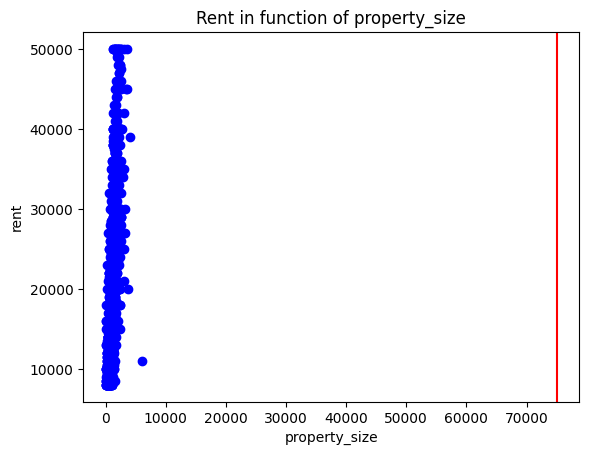

In [49]:
#Plot one of the features with outliers

plt.plot(data['property_size'], data['rent'], 'bo')
plt.axvline(x=75000, color='r')
plt.ylabel('rent')
plt.xlabel('property_size')
plt.title('Rent in function of property_size')
plt.show()

In [50]:
data

,id,type,activation_date,longitude,lease_type,gym,lift,swimming_pool,furnishing,parking,property_size,bathroom,facing,floor,total_floor,amenities,building_type,balconies,rent
16541,2176,1,22-12-2017 18:25,77.561093,0,0,1,0,2,0,800,2.0,1,3.0,3.0,636,0,2.0,16000.0
16542,390,1,3/7/2017 10:34,77.536256,0,0,0,0,2,3,1200,2.0,1,0.0,2.0,240,2,0.0,10000.0
16543,3572,5,19-07-2018 20:49,77.636025,0,0,0,0,2,0,350,1.0,0,3.0,3.0,286,3,1.0,12500.0
16544,2780,1,8/3/2018 20:43,77.735438,0,1,1,1,2,0,1153,2.0,0,7.0,12.0,849,0,1.0,22500.0
16545,3612,1,19-06-2018 15:12,77.692249,3,0,0,0,2,0,1300,2.0,2,4.0,5.0,28,0,4.0,22000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,675,0,11/10/2017 17:08,77.615395,0,0,1,0,2,3,850,2.0,0,1.0,4.0,673,0,1.0,20000.0
20528,1558,1,19-10-2017 20:31,77.632361,0,0,0,0,2,0,1000,2.0,1,1.0,2.0,248,3,2.0,30000.0
20529,2169,1,21-12-2017 21:18,77.566597,3,1,1,0,2,0,1000,2.0,7,5.0,5.0,1164,0,2.0,16000.0
20530,23,1,28-06-2018 21:58,77.647694,3,0,1,0,2,0,1000,2.0,0,2.0,4.0,714,0,3.0,30000.0


In [51]:
# Use pd.to_datetime with errors='coerce' to handle different date formats
data['activation_date'] = pd.to_datetime(data['activation_date'], errors='coerce')

# Define a reference date (you can choose any date based on your data)
reference_date = pd.Timestamp('21-12-2017 21:18')

# Calculate the numeric representation of the date and time (in seconds)
data['activation_date_numeric'] = (data['activation_date'] - reference_date).dt.total_seconds()

# Display the resulting DataFrame
print(data[['activation_date', 'activation_date_numeric']])




          activation_date  activation_date_numeric
16541 2017-12-22 18:25:00                  76020.0
16542 2017-03-07 10:34:00              -25008240.0
16543 2018-07-19 20:49:00               18142260.0
16544 2018-08-03 20:43:00               19437900.0
16545 2018-06-19 15:12:00               15530040.0
...                   ...                      ...
20524 2017-11-10 17:08:00               -3557400.0
20528 2017-10-19 20:31:00               -5446020.0
20529 2017-12-21 21:18:00                      0.0
20530 2018-06-28 21:58:00               16332000.0
20531 2018-08-07 22:31:00               19789980.0

[3947 rows x 2 columns]


In [52]:
# Convert 'activation_date' to datetime objects
data['activation_date'] = pd.to_datetime(data['activation_date'], errors='coerce')

# Convert datetime objects to numeric values (Unix timestamp)
data['activation_date_numeric'] = data['activation_date'].astype(int) // 10**9

# Copy values from 'activation_date_numeric' to 'activation_date'
data['activation_date'] = data['activation_date_numeric']

# Drop 'activation_date_numeric' column
data.drop('activation_date_numeric', axis=1, inplace=True)

# Display the DataFrame with modified 'activation_date'
print(data)



         id  type  activation_date  longitude  lease_type  gym  lift  \
16541  2176     1       1513967100  77.561093           0    0     1   
16542   390     1       1488882840  77.536256           0    0     0   
16543  3572     5       1532033340  77.636025           0    0     0   
16544  2780     1       1533328980  77.735438           0    1     1   
16545  3612     1       1529421120  77.692249           3    0     0   
...     ...   ...              ...        ...         ...  ...   ...   
20524   675     0       1510333680  77.615395           0    0     1   
20528  1558     1       1508445060  77.632361           0    0     0   
20529  2169     1       1513891080  77.566597           3    1     1   
20530    23     1       1530223080  77.647694           3    0     1   
20531   494     0       1533681060  77.574336           0    0     0   

       swimming_pool  furnishing  parking  property_size  bathroom  facing  \
16541              0           2        0            800 

In [53]:
newTrain = data.iloc[:2632]
newTest = data.iloc[1315:]
# Filter numeric columns
numeric_columns = newTrain.select_dtypes(include=['number']).columns
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75]) #Get 1st and 3rd quartiles (25% -> 75% of data will be kept)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5) #Get lower bound
    upper_bound = quartile_3 + (iqr * 1.5) #Get upper bound
    return np.where((ys > upper_bound) | (ys < lower_bound)) #Get outlier values



# Initialize an empty DataFrame for trainWithoutOutliers
trainWithoutOutliers = pd.DataFrame()

# Iterate through each numeric column
for column in numeric_columns:
    # Get outlier indices using the outliers_iqr function
    outlier_indices = outliers_iqr(newTrain[column])[0]

    # Drop outliers from the current column
    column_without_outliers = newTrain[column].loc[~newTrain.index.isin(outlier_indices)]

    # Add the column without outliers to the new DataFrame
    trainWithoutOutliers[column] = column_without_outliers

# Display the resulting DataFrame
print(trainWithoutOutliers)


         id  type  activation_date  longitude  lease_type  gym  lift  \
16541  2176     1       1513967100  77.561093           0    0     1   
16542   390     1       1488882840  77.536256           0    0     0   
16543  3572     5       1532033340  77.636025           0    0     0   
16544  2780     1       1533328980  77.735438           0    1     1   
16545  3612     1       1529421120  77.692249           3    0     0   
...     ...   ...              ...        ...         ...  ...   ...   
19168  3288     2       1530294900  77.686643           0    1     1   
19169  2019     1       1512069060  77.591978           3    0     0   
19170   918     1       1500575580  77.637812           3    0     0   
19171  1858     2       1486836660  77.568515           3    1     1   
19172  2213     1       1514398740  77.509449           3    0     0   

       swimming_pool  furnishing  parking  property_size  bathroom  facing  \
16541              0           2        0            800 

In [54]:
# Assuming 'trainWithoutOutliers' is the DataFrame you want to export
trainWithoutOutliers.to_csv('Trained_data.csv', index=False)
